## Importing librarys and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.metrics as metrics

In [2]:
application_record = pd.read_csv('excel_files/application_record.csv',on_bad_lines = 'skip')
credit_record = pd.read_csv('excel_files/credit_record.csv',on_bad_lines = 'skip')

## 1. Data preprocessing

### 1.1 Basic inspections

In [3]:
print('Rows and Coulumns : {}'.format(application_record.shape))
print('Number of unique ID : {}'.format(application_record['ID'].nunique()))
application_record.head()

Rows and Coulumns : (438557, 18)
Number of unique ID : 438510


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Here we can see that totlal 438510 rows and 18 columns are present <br>
Also it can be seen that number of unique ids are not same as total rows hence there are duplicates

In [4]:
print('Rows and Coulumns : {}'.format(credit_record.shape))
print('Number of unique ID : {}'.format(credit_record['ID'].nunique()))
credit_record.head()

Rows and Coulumns : (1048575, 3)
Number of unique ID : 45985


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Here we can see that totlal 45985 rows and 3 columns are present <br>
Also it can be seen that number of unique ids are not same as total rows hence there are duplicates

### 1.2 DataTypes

In [5]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

The application_record dataset gathers 438,557 observations regarding the personal and financial information of the bank's customers. Each row represents a specific bank customer, that must have an unique ID number, and contains 17 different information about them.

In [6]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### 1.3 NULL VALUES

In [7]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
application_record.drop("OCCUPATION_TYPE", axis = 1,inplace = True)

In [9]:
application_record.shape

(438557, 17)

The application_record dataset had null values in the occupation_type column so we dropped the column as it was unnecessary

In [10]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

The credit_record dataset did not had any null values

### 1.4 DUPLICATES

In [11]:
application_record['ID'].duplicated().sum()

47

In [12]:
application_record.shape

(438557, 17)

In [13]:
application_record.drop_duplicates('ID',keep=False,inplace = True)

All the duplicate values in application_record dataset were removed <br>
We do not remove duplicates from credit_record dataset as they contain important data that will help classify good and bad customers

### 1.5 Dependent Variable

The Dependent Variable is not given so we will create one. It will catagorize the customer into 3 clusters: -1 (Not Enough Data), 0 (Bad Customer) and 1 (Good Customer) <br>
Then we will drop the rows falling in -1 cluster as it does not has sufficient data

In [14]:
credit_decision = pd.DataFrame()
credit_decision['ID'] = credit_record['ID'].unique()  # Storing all unique values

In [15]:
def get_credit_decision(id):
    """Determines, for a given client ID, if the client is good or bad based on payment history and card usage."""
    
    # checks if there is at least one payment with more than 30 days delay
    if sum(credit_record[credit_record['ID']==id]['STATUS'].isin(['1','2','3','4','5']))>0:
        return 0
    
    # if not, checks if the client never used the credit card
    elif sum(credit_record[credit_record['ID']==id]['STATUS'].isin(['X']))==len(credit_record[credit_record['ID']==id]['STATUS']):
        return -1
    
    # if not, assumes the client is a good payer
    else:
        return 1

In [16]:
# Creates a 'Decision' column in credit_decision dataset and calls get_credit_decision() to get the correct cluster
credit_decision['Decision'] = credit_decision['ID'].map(get_credit_decision)

credit_decision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        45985 non-null  int64
 1   Decision  45985 non-null  int64
dtypes: int64(2)
memory usage: 718.6 KB


Cleaning the Data

In [17]:
# excludes all customers without sufficient data (category -1)
credit_decision = credit_decision[credit_decision['Decision']!=-1]

In [18]:
credit_decision['Decision'].value_counts()

Decision
1    36099
0     5350
Name: count, dtype: int64

Joining the Dataframes

In [19]:
# application_record = pd.merge(credit_decision,application_record)
# application_record.head()
credit_data = pd.merge(credit_decision,application_record)
credit_data.head()

,ID,Decision,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008810,1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0


## 2. EDA

In [20]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.384630e+05,438463.000000,4.384630e+05,438463.000000,438463.000000,438463.0,438463.000000,438463.000000,438463.000000,438463.000000
mean,6.021894e+06,0.427384,1.875220e+05,-15997.934334,60564.534488,1.0,0.206129,0.287762,0.108196,2.194461
std,5.713554e+05,0.724879,1.100832e+05,4185.044293,138768.684097,0.0,0.404525,0.452720,0.310628,0.897194
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609340e+06,0.000000,1.215000e+05,-19484.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047690e+06,0.000000,1.611000e+05,-15630.000000,-1468.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.454118e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [21]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


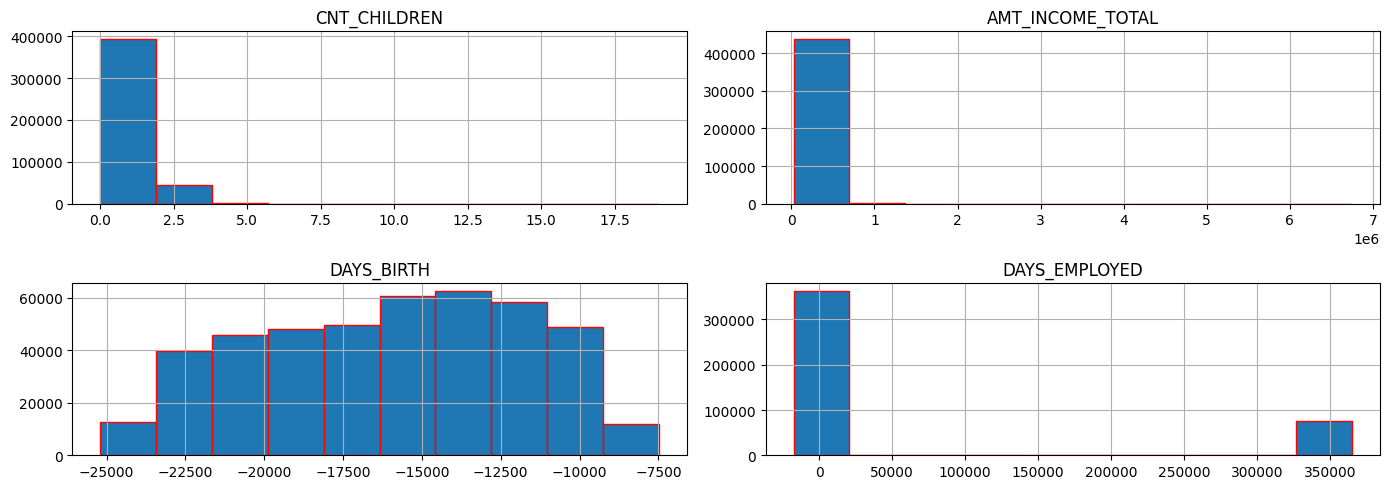

In [22]:
fig, axes = plt.subplots(2,2)

g1= application_record.hist("CNT_CHILDREN", bins = 10,edgecolor = "r",ax=axes[0,0])

g2= application_record.hist("AMT_INCOME_TOTAL", bins = 10,edgecolor = "r",ax=axes[0,1])

g3= application_record.hist("DAYS_BIRTH", bins = 10,edgecolor = "r",ax=axes[1,0])

g4 = application_record.hist("DAYS_EMPLOYED", bins = 10,edgecolor = "r",ax=axes[1,1])

fig.set_size_inches(14,5)

plt.tight_layout()



plt.show()

There are outliers in 2 columns.

* CNT_CHILDREN
* AMT_INCOME_TOTAL

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

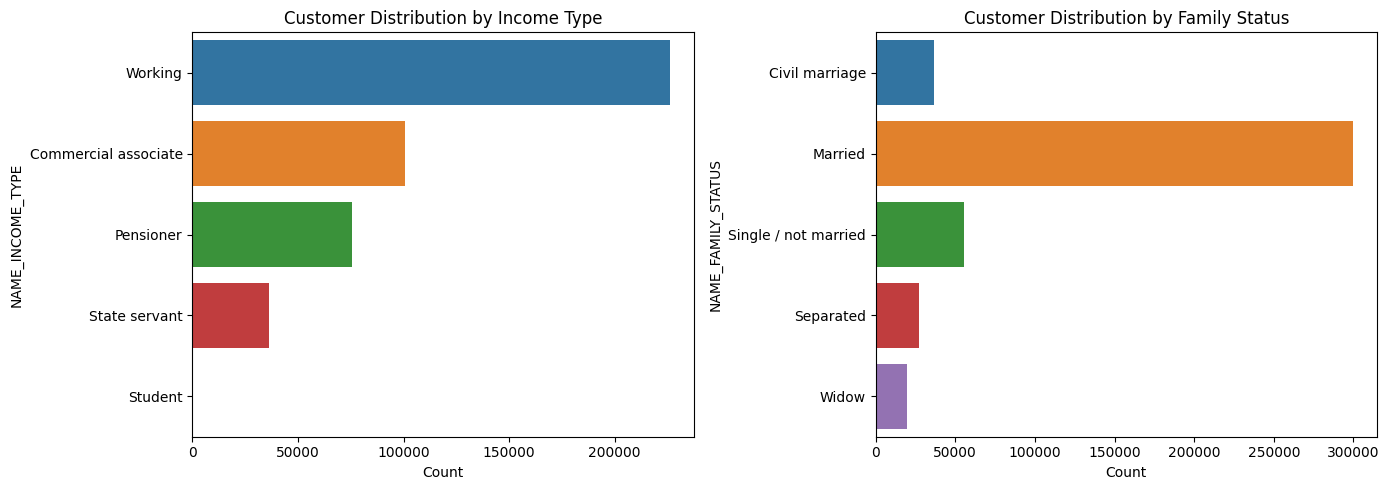

In [23]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=application_record.NAME_INCOME_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=application_record.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

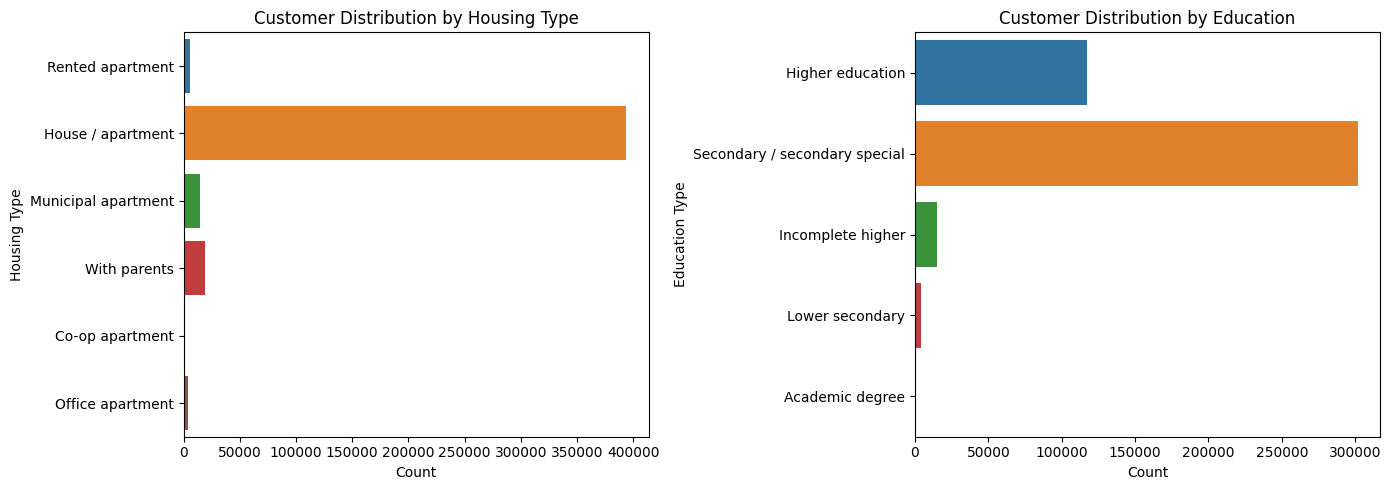

In [24]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=application_record.NAME_HOUSING_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=application_record.NAME_EDUCATION_TYPE, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

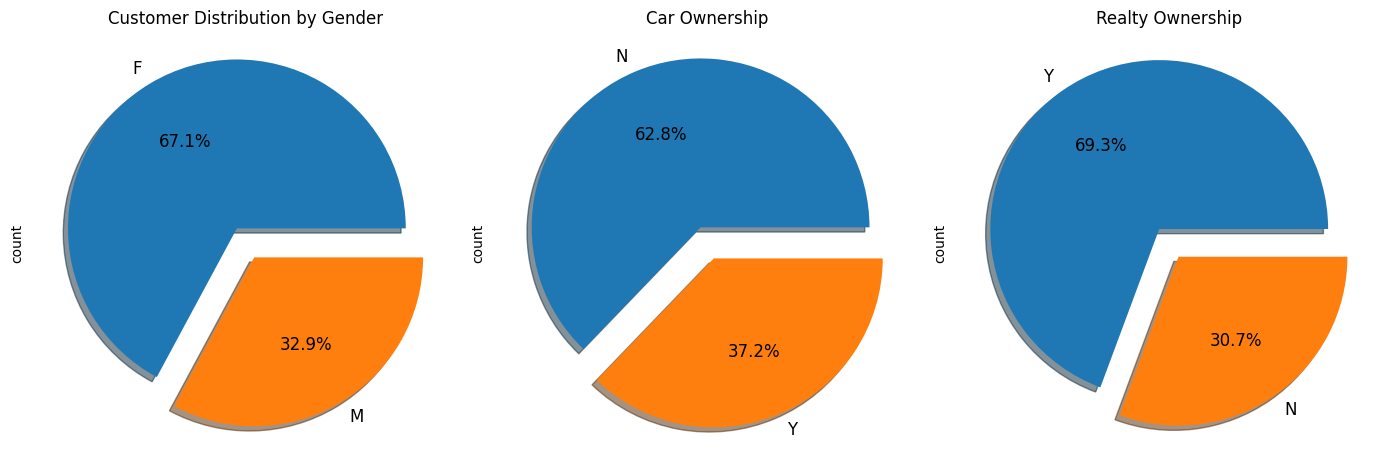

In [25]:
fig, axes = plt.subplots(1,3)

g1= application_record['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= application_record['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= application_record['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

Now Lets Convert all the categorical data into numeric data

In [26]:
categoric_features = credit_data.select_dtypes(include=['object']).columns.tolist()
numeric_features = pd.DataFrame()

In [27]:
def categotical_to_numeric(category):
  le = LabelEncoder()
  credit_data[category] = le.fit_transform(credit_data[category])

In [28]:
for category in categoric_features:
  categotical_to_numeric(category)

In [29]:
credit_data.head()

,ID,Decision,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,1,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008810,1,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0


In [30]:
credit_decision['Decision'].value_counts(normalize=True)

Decision
1    0.870926
0    0.129074
Name: proportion, dtype: float64

Text(0.9, 0.06453714202996454, '12.91%')

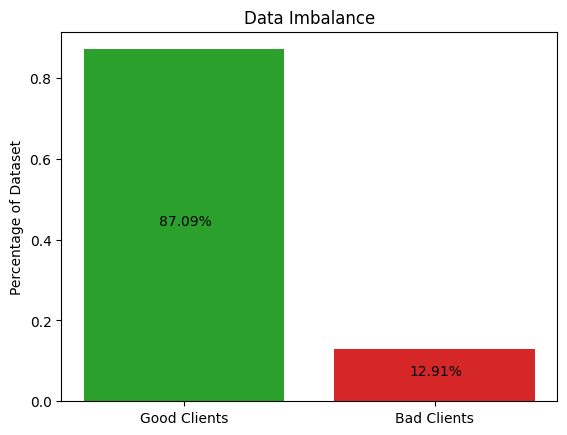

In [31]:
fig, ax = plt.subplots()

client = ['Good Clients','Bad Clients']
proportions = credit_decision['Decision'].value_counts(normalize=True)
bar_colors = ['tab:green', 'tab:red']

ax.bar(client, proportions, color=bar_colors)

ax.set_ylabel('Percentage of Dataset')
ax.set_title('Data Imbalance')

ax.text(0-0.1, proportions[1]/2, '{:.2%}'.format(proportions[1]), size=10)
ax.text(1-0.1, proportions[0]/2, '{:.2%}'.format(proportions[0]), size=10)


## 3. Building the Model

In [32]:
x = credit_data.drop(['Decision', 'ID'], axis=1)
y = credit_data['Decision']

We will be dividing the data into training and test set in the ratio 8:2

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Here we will be using Decision Tree and Random Forest Classification Techniques

In [34]:
# Building the Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier()

In [35]:
y_pred_dtc = DTC.predict(x_test)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [36]:
# Building the Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier()

In [37]:
y_pred_rfc = RFC.predict(x_test)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## 4. Results

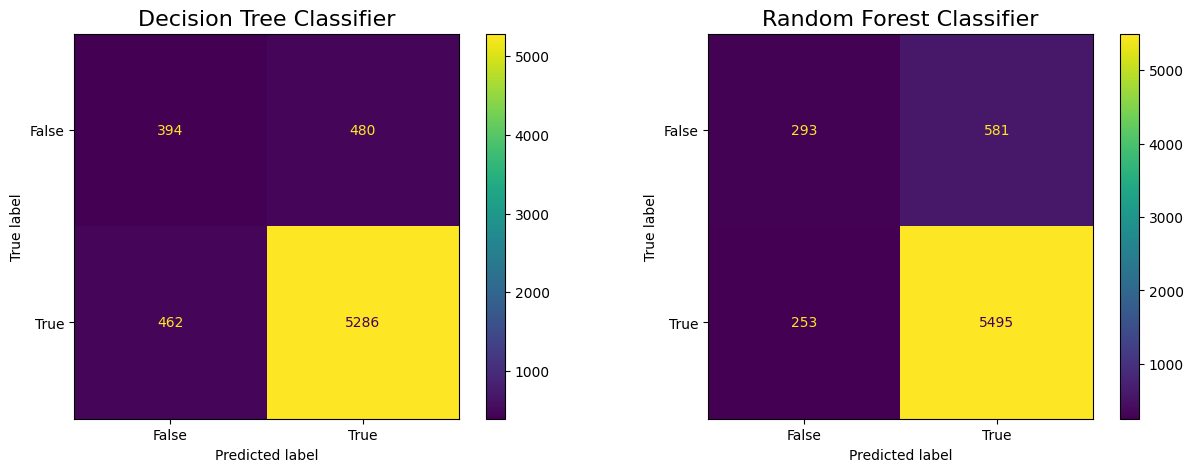

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

confusion_matrix_dtc = metrics.confusion_matrix(y_test, y_pred_dtc) # For Decision Tree
confusion_matrix_rfc = metrics.confusion_matrix(y_test, y_pred_rfc) # For Random Forest

axes[0].set_title("Decision Tree Classifier", size=16)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dtc, display_labels = [False, True]).plot(ax=axes[0])

axes[1].set_title("Random Forest Classifier", size=16)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc, display_labels = [False, True]).plot(ax=axes[1])


# cm_display.plot()
plt.show()


In [39]:
def tr(y_t,y_p):
  accuracy = accuracy_score(y_t, y_p)
  precision = precision_score(y_t, y_p, average='weighted')
  recall = recall_score(y_t, y_p, average='weighted')
  f1 = f1_score(y_t, y_p, average='weighted')
  print("Accuracy : ",round(accuracy*100,2))
  print("Precision : ",round(precision*100,2))
  print("Recall : ",round(recall*100,2))
  print("F1 : ",round(f1*100,2))

Accuracy, Precision, Recall and F1 score of Decision Tree Classifier

In [40]:
tr(y_test,y_pred_dtc)

Accuracy :  85.77
Precision :  85.65
Recall :  85.77
F1 :  85.71


Accuracy, Precision, Recall and F1 score of Randon Forest Classifier

In [41]:
tr(y_test,y_pred_rfc)

Accuracy :  87.41
Precision :  85.58
Recall :  87.41
F1 :  86.13
